In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
X_train=pd.read_csv("../input/widsdatathon2021/TrainingWiDS2021.csv")
X_test=pd.read_csv("../input/widsdatathon2021/UnlabeledWiDS2021.csv")

In [4]:
X_train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
Y_train=X_train['diabetes_mellitus']

In [6]:
x_train=X_train.drop(['Unnamed: 0','encounter_id','hospital_id','diabetes_mellitus'],axis=1)
x_test=X_test.drop(['Unnamed: 0','encounter_id','hospital_id'],axis=1)

In [7]:
print(x_train.shape,x_test.shape)

(130157, 177) (10234, 177)


### EDA

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


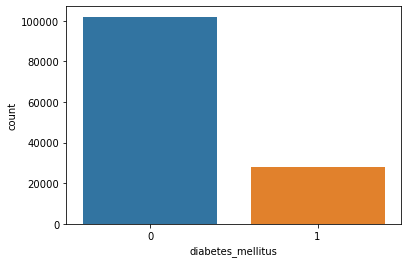

Dataset is Unbalanced


0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [8]:
sns.countplot(Y_train)
plt.show()
print('Dataset is Unbalanced')
Y_train.value_counts()

In [9]:
x_train.describe()

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,...,22712.000000,16760.000000,16760.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,83.791104,2.886149,185.492683,...,145.949537,247.525419,239.617358,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852
std,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,24.963063,0.689812,85.858208,...,100.211935,131.440167,128.562211,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888
min,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250000,0.0,38.600000,1.200000,101.000000,...,31.000000,42.000000,38.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,23.598006,0.000000,162.500000,427.000000,0.045833,0.0,66.500000,2.400000,113.000000,...,77.000000,144.000000,138.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,27.564749,0.000000,170.100000,653.000000,0.155556,0.0,80.000000,2.900000,122.000000,...,108.000000,228.125000,218.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.803127,0.000000,177.800000,969.000000,0.423611,0.0,96.800000,3.400000,301.000000,...,182.000000,333.000000,324.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,1111.000000,175.627778,0.0,186.000000,4.600000,308.000000,...,514.905000,720.000000,654.813793,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Missing_values=pd.DataFrame(x_train.isnull().sum()/(x_train.shape[0]))

In [11]:
Missing_values.columns=['Missing ratio']

In [12]:
Missing_values.sort_values(by='Missing ratio',ascending=False)

,Missing ratio
h1_bilirubin_min,0.920896
h1_bilirubin_max,0.920896
h1_albumin_min,0.914319
h1_albumin_max,0.914319
h1_lactate_min,0.910185
...,...
pre_icu_los_days,0.000000
readmission_status,0.000000
apache_post_operative,0.000000
arf_apache,0.000000


In [13]:
col_features=Missing_values[Missing_values['Missing ratio']>0.6].index

In [14]:
x_train=x_train.drop(labels=col_features,axis=1)
x_test=x_test.drop(labels=col_features,axis=1)

In [15]:
print(x_train.shape,x_test.shape)

(130157, 110) (10234, 110)


In [16]:
x_train.dropna().nunique().reset_index()

,index,0
0,age,74
1,bmi,4767
2,elective_surgery,2
3,ethnicity,6
4,gender,2
...,...,...
105,hepatic_failure,2
106,immunosuppression,2
107,leukemia,2
108,lymphoma,2


In [17]:
count_values = x_train.dropna().nunique().reset_index()
only_one = count_values[count_values[0]<2]["index"].to_list()

In [18]:
only_one

['readmission_status', 'gcs_unable_apache']

In [19]:
x_train.drop(columns=only_one, inplace = True)
x_test.drop(columns=only_one, inplace = True)

In [20]:
print(x_train.shape,x_test.shape)

(130157, 108) (10234, 108)


In [21]:
categorical_features=[]
numerical_features=[]
for features in x_train.columns:
    if (x_train[features]).dtype=='O':
        categorical_features.append(features)
    elif (x_train[features]).dtype=='int' or (x_train[features]).dtype=='float':
        numerical_features.append(features)


In [22]:
len(numerical_features)

102

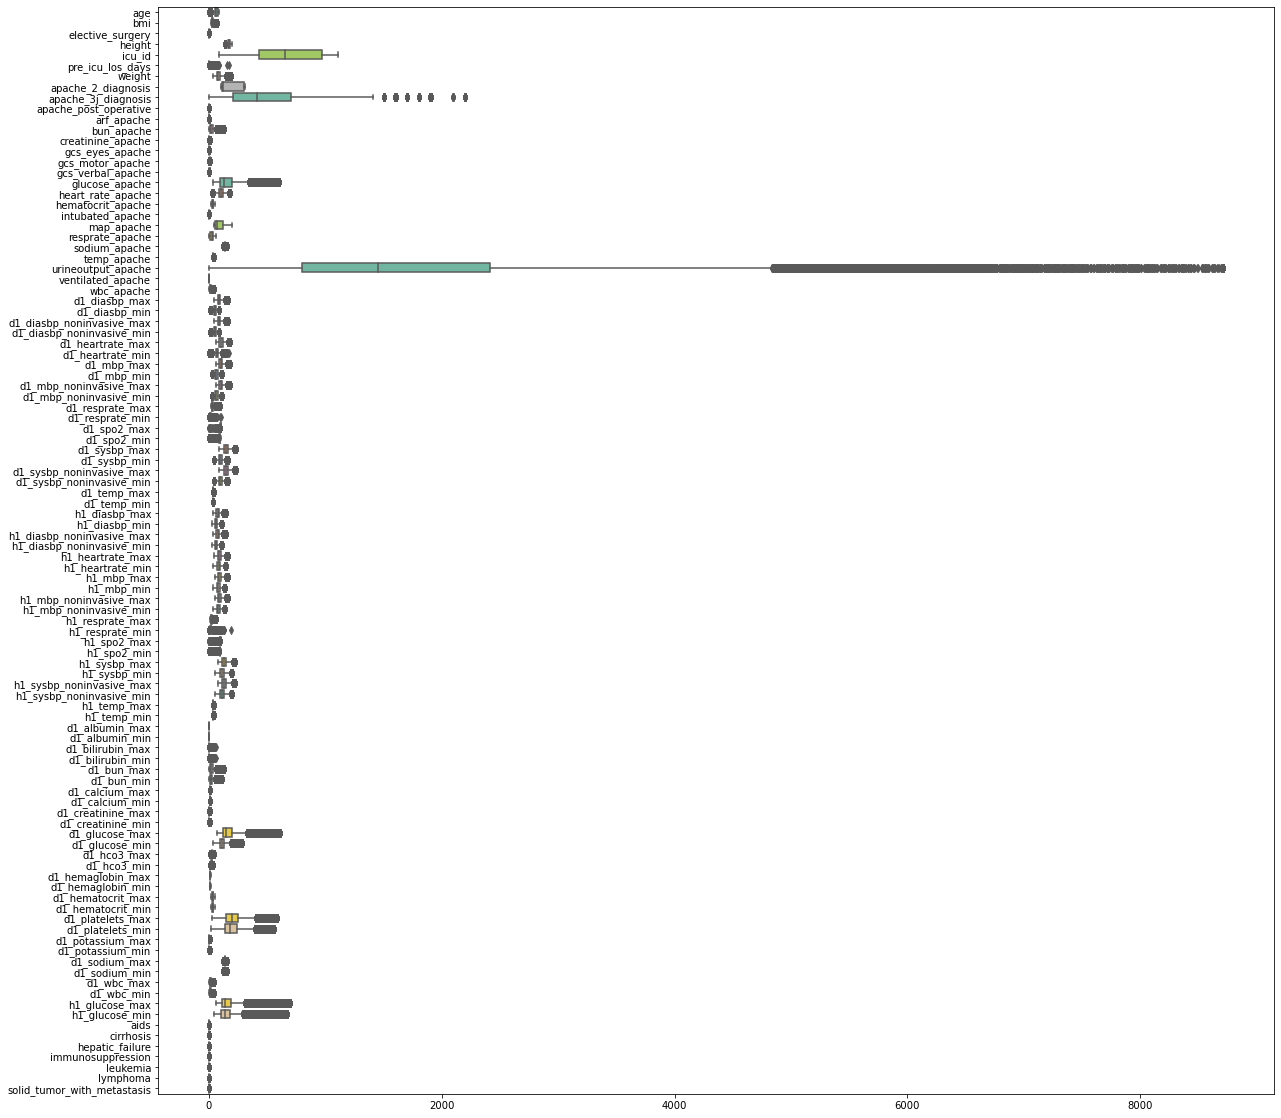

In [23]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=x_train, orient="h", palette="Set2")

In [24]:
df=pd.get_dummies(x_train[categorical_features])
x_train=pd.concat([x_train,df],axis=1)
df2=pd.get_dummies(x_test[categorical_features])
x_test=pd.concat([x_test,df2],axis=1)

In [25]:
print(x_train.shape,x_test.shape)

(130157, 147) (10234, 142)


In [26]:
column=[]
for i in x_train.columns:
    if i not in x_test.columns:
        column.append(i)

In [27]:
column

['hospital_admit_source_Acute Care/Floor',
 'hospital_admit_source_ICU',
 'hospital_admit_source_Observation',
 'hospital_admit_source_Other',
 'hospital_admit_source_PACU']

In [28]:
x_train=x_train.drop(labels=column,axis=1)

In [29]:
print(x_train.shape,x_test.shape)

(130157, 142) (10234, 142)


In [30]:
x_train=x_train.drop(labels=categorical_features,axis=1)
x_test=x_test.drop(labels=categorical_features,axis=1)

In [31]:
print(x_train.shape,x_test.shape)

(130157, 136) (10234, 136)


In [32]:
for i in x_train.columns:
    if (x_train[i]).dtype=='int32' or(x_train[i]).dtype=='float64' :
        x_train[i] =x_train[i].fillna(x_train[i].mean())
        x_test[i]=x_test[i].fillna(x_train[i].mean())
    

In [33]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,Y_train,test_size=0.3,stratify=Y_train)

In [34]:
print(X_train.shape,X_val.shape)

(91109, 136) (39048, 136)


### Modeling

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rnd_clf=RandomForestClassifier(n_estimators=200,verbose=2,n_jobs=-1,random_state=42,class_weight='balanced')

In [37]:
rnd_clf.fit(X_train,Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200building tree 4 of 200


building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s


building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.8s


building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   43.6s finished


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42, verbose=2)

In [38]:
feature_imp={}
for i,j in enumerate(X_train.columns):
    feature_imp[j]=rnd_clf.feature_importances_[i]

In [39]:
feature_imp

{'age': 0.018302948850391205,
 'bmi': 0.027522363727746763,
 'elective_surgery': 0.0008080715730264813,
 'height': 0.008623213791680611,
 'icu_id': 0.011203207081638829,
 'pre_icu_los_days': 0.01046291121378991,
 'weight': 0.021199839643599255,
 'apache_2_diagnosis': 0.009844310990122264,
 'apache_3j_diagnosis': 0.010243608746369126,
 'apache_post_operative': 0.0007866187680375893,
 'arf_apache': 0.002809638841885537,
 'bun_apache': 0.010058783865503108,
 'creatinine_apache': 0.011555221757143108,
 'gcs_eyes_apache': 0.002754121053466337,
 'gcs_motor_apache': 0.0029597598847728225,
 'gcs_verbal_apache': 0.0028259992956165213,
 'glucose_apache': 0.06602094160113924,
 'heart_rate_apache': 0.01010498250545835,
 'hematocrit_apache': 0.008608587822444199,
 'intubated_apache': 0.0014003009554758522,
 'map_apache': 0.008468692060586508,
 'resprate_apache': 0.00809617840220785,
 'sodium_apache': 0.006772044533652834,
 'temp_apache': 0.007785657578925126,
 'urineoutput_apache': 0.00831813877435

In [40]:
feature_imp_df=pd.DataFrame.from_dict(feature_imp,orient='index')

In [41]:
feature_imp_df.columns=['Significance value']

<AxesSubplot:>

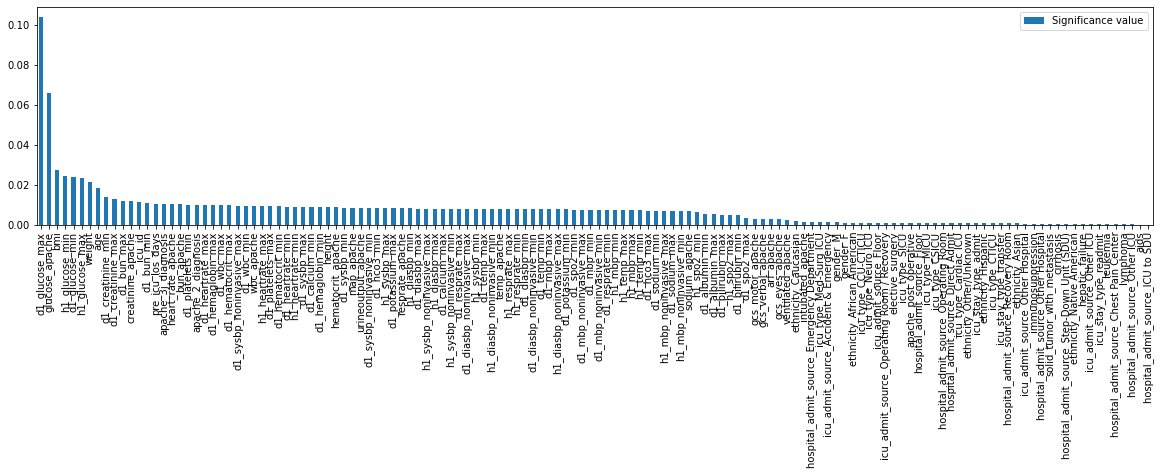

In [42]:

feature_imp_df.sort_values(by='Significance value',ascending=False).plot(kind='bar',figsize=(20, 4))

In [43]:
feature_selected=feature_imp_df.sort_values(by='Significance value',ascending=False).index[0:10]

In [44]:
feature_selected

Index(['d1_glucose_max', 'glucose_apache', 'bmi', 'h1_glucose_min',
       'd1_glucose_min', 'h1_glucose_max', 'weight', 'age',
       'd1_creatinine_min', 'd1_creatinine_max'],
      dtype='object')

In [45]:
X_train_final=X_train[feature_selected]
X_val_final=X_val[feature_selected]
X_test_final=x_test[feature_selected]

In [46]:
print(X_train_final.shape,X_val_final.shape,X_test_final.shape)

(91109, 10) (39048, 10) (10234, 10)


In [47]:
rnd_clf1=RandomForestClassifier(n_estimators=300,verbose=2,n_jobs=-1,random_state=42,class_weight='balanced')
rnd_clf1.fit(X_train_final,Y_train)
y_pred1=rnd_clf1.predict(X_val_final)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300building tree 4 of 300

building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.2s


building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.2s finished


In [48]:
y_pred1=rnd_clf1.predict_proba(X_val_final)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.2s finished


In [49]:
y_pred1[:,1]

array([0.16666667, 0.12333333, 0.09333333, ..., 0.69333333, 0.00333333,
       0.03      ])

In [50]:
fpr,tpr,thresholds=roc_curve(Y_val,y_pred1[:,1])
thresholds=thresholds[2:]

In [51]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

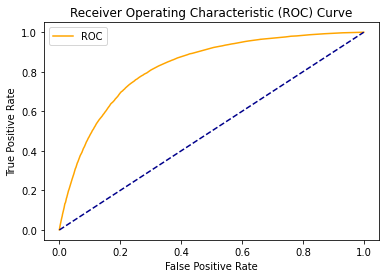

AUC : 0.823489899594043


In [52]:
plot_roc_curve(fpr, tpr)
print('AUC :',roc_auc_score(Y_val,y_pred1[:,1]))

In [53]:
from sklearn.model_selection import RandomizedSearchCV
n_est=np.linspace(100,1000,10,dtype=int)
weights = np.linspace(0.05, 0.95, 20)
max_depth=np.linspace(1,10,10,dtype=int)
distributions={'class_weight': [{0: x, 1: 1.0-x} for x in weights],'n_estimators':n_est,'max_depth':max_depth}
gsc = RandomizedSearchCV(estimator=RandomForestClassifier(max_features='log2'),param_distributions=distributions,scoring='accuracy',cv=3,verbose=3,n_jobs=-1,random_state=42)

grid_result = gsc.fit(X_train_final, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


Best parameters : {'n_estimators': 600, 'max_depth': 10, 'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


In [54]:
final_clf=RandomForestClassifier(n_estimators= 600,max_depth= 10,class_weight={0: 0.5236842105263158, 1: 0.47631578947368425},
                                 max_features='log2',n_jobs=-1,verbose=2,random_state=42)

In [55]:
final_clf.fit(X_train_final, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 600building tree 2 of 600

building tree 3 of 600
building tree 4 of 600
building tree 5 of 600
building tree 6 of 600
building tree 7 of 600
building tree 8 of 600
building tree 9 of 600
building tree 10 of 600
building tree 11 of 600
building tree 12 of 600
building tree 13 of 600
building tree 14 of 600
building tree 15 of 600
building tree 16 of 600
building tree 17 of 600
building tree 18 of 600
building tree 19 of 600
building tree 20 of 600
building tree 21 of 600
building tree 22 of 600
building tree 23 of 600
building tree 24 of 600
building tree 25 of 600
building tree 26 of 600
building tree 27 of 600
building tree 28 of 600
building tree 29 of 600
building tree 30 of 600
building tree 31 of 600
building tree 32 of 600
building tree 33 of 600
building tree 34 of 600
building tree 35 of 600
building tree 36 of 600
building tree 37 of 600
building tree 38 of 600
building tree 39 of 600
building tree 40 of 600


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s


building tree 41 of 600
building tree 42 of 600
building tree 43 of 600
building tree 44 of 600
building tree 45 of 600
building tree 46 of 600
building tree 47 of 600
building tree 48 of 600
building tree 49 of 600
building tree 50 of 600
building tree 51 of 600
building tree 52 of 600
building tree 53 of 600
building tree 54 of 600
building tree 55 of 600
building tree 56 of 600
building tree 57 of 600
building tree 58 of 600
building tree 59 of 600
building tree 60 of 600
building tree 61 of 600
building tree 62 of 600
building tree 63 of 600
building tree 64 of 600
building tree 65 of 600
building tree 66 of 600
building tree 67 of 600
building tree 68 of 600
building tree 69 of 600
building tree 70 of 600
building tree 71 of 600
building tree 72 of 600
building tree 73 of 600
building tree 74 of 600building tree 75 of 600

building tree 76 of 600
building tree 77 of 600
building tree 78 of 600
building tree 79 of 600
building tree 80 of 600
building tree 81 of 600
building tree 82

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.8s


building tree 159 of 600
building tree 160 of 600
building tree 161 of 600
building tree 162 of 600
building tree 163 of 600
building tree 164 of 600
building tree 165 of 600
building tree 166 of 600
building tree 167 of 600
building tree 168 of 600
building tree 169 of 600
building tree 170 of 600
building tree 171 of 600
building tree 172 of 600
building tree 173 of 600
building tree 174 of 600
building tree 175 of 600
building tree 176 of 600
building tree 177 of 600
building tree 178 of 600
building tree 179 of 600
building tree 180 of 600
building tree 181 of 600
building tree 182 of 600
building tree 183 of 600
building tree 184 of 600
building tree 185 of 600
building tree 186 of 600
building tree 187 of 600
building tree 188 of 600
building tree 189 of 600
building tree 190 of 600
building tree 191 of 600
building tree 192 of 600
building tree 193 of 600
building tree 194 of 600
building tree 195 of 600
building tree 196 of 600
building tree 197 of 600
building tree 198 of 600


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   18.3s


building tree 364 of 600
building tree 365 of 600
building tree 366 of 600
building tree 367 of 600
building tree 368 of 600
building tree 369 of 600
building tree 370 of 600
building tree 371 of 600
building tree 372 of 600building tree 373 of 600

building tree 374 of 600
building tree 375 of 600
building tree 376 of 600
building tree 377 of 600
building tree 378 of 600
building tree 379 of 600
building tree 380 of 600
building tree 381 of 600
building tree 382 of 600
building tree 383 of 600
building tree 384 of 600
building tree 385 of 600
building tree 386 of 600
building tree 387 of 600
building tree 388 of 600
building tree 389 of 600
building tree 390 of 600
building tree 391 of 600
building tree 392 of 600
building tree 393 of 600
building tree 394 of 600
building tree 395 of 600
building tree 396 of 600
building tree 397 of 600
building tree 398 of 600
building tree 399 of 600
building tree 400 of 600
building tree 401 of 600
building tree 402 of 600
building tree 403 of 600


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   31.1s finished


RandomForestClassifier(class_weight={0: 0.5236842105263158,
                                     1: 0.47631578947368425},
                       max_depth=10, max_features='log2', n_estimators=600,
                       n_jobs=-1, random_state=42, verbose=2)

In [56]:
y_pred_final=final_clf.predict_proba(X_val_final)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    1.1s finished


In [57]:
fpr,tpr,thresholds=roc_curve(Y_val,y_pred_final[:,1])
thresholds=thresholds[2:]

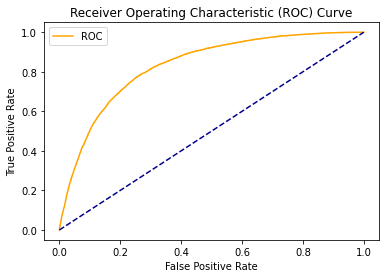

AUC : 0.8303783704786601


In [58]:
plot_roc_curve(fpr, tpr)
print('AUC :',roc_auc_score(Y_val,y_pred_final[:,1]))

In [59]:
from sklearn.model_selection import RandomizedSearchCV

n_est=np.linspace(100,1000,10,dtype=int)
weights = np.linspace(0.05, 0.95, 20)
max_depth=np.linspace(1,10,10,dtype=int)
distributions={'n_estimators':n_est,'max_depth':max_depth}
gbsc = RandomizedSearchCV(estimator=GradientBoostingClassifier(max_features='log2'),param_distributions=distributions,scoring='accuracy',cv=3,verbose=3,n_jobs=-1,random_state=42)

grid_result = gbsc.fit(X_train_final, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.5min finished


Best parameters : {'n_estimators': 300, 'max_depth': 3}


In [60]:
final_clf2=GradientBoostingClassifier(n_estimators= 300,max_depth= 3,
                                 max_features='log2',verbose=2,random_state=42)
final_clf2.fit(X_train_final, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0131           19.73s
         2           0.9876           19.77s
         3           0.9648           20.18s
         4           0.9473           20.75s
         5           0.9331           20.10s
         6           0.9204           19.95s
         7           0.9128           20.31s
         8           0.9029           20.14s
         9           0.8952           19.99s
        10           0.8904           19.88s
        11           0.8852           19.72s
        12           0.8796           19.66s
        13           0.8752           19.54s
        14           0.8707           19.63s
        15           0.8662           19.73s
        16           0.8622           19.87s
        17           0.8590           19.67s
        18           0.8551           19.75s
        19           0.8520           19.67s
        20           0.8491           19.68s
        21           0.8465           19.56s
        2

       183           0.7913            8.30s
       184           0.7912            8.22s
       185           0.7911            8.14s
       186           0.7910            8.07s
       187           0.7910            8.00s
       188           0.7909            7.93s
       189           0.7908            7.86s
       190           0.7906            7.79s
       191           0.7905            7.72s
       192           0.7904            7.65s
       193           0.7903            7.58s
       194           0.7903            7.51s
       195           0.7902            7.44s
       196           0.7901            7.36s
       197           0.7900            7.29s
       198           0.7899            7.23s
       199           0.7898            7.16s
       200           0.7897            7.08s
       201           0.7896            7.02s
       202           0.7896            6.94s
       203           0.7895            6.87s
       204           0.7895            6.80s
       205

GradientBoostingClassifier(max_features='log2', n_estimators=300,
                           random_state=42, verbose=2)

In [61]:
y_pred_final2=final_clf2.predict_proba(X_val_final)

In [62]:
fpr,tpr,thresholds=roc_curve(Y_val,y_pred_final2[:,1])
thresholds=thresholds[2:]

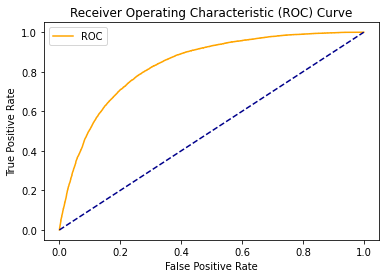

AUC : 0.8354282087723747


In [63]:
plot_roc_curve(fpr, tpr)
print('AUC :',roc_auc_score(Y_val,y_pred_final2[:,1]))

In [64]:
classification_prob=pd.DataFrame(y_pred_final[:,1])

In [65]:
classification_prob['GB Classifier']=y_pred_final2[:,1]

In [66]:
classification_prob.columns=['RF Classifier','GB Classifier']

In [67]:
classification_prob['Overall_Avg']=(classification_prob['GB Classifier']+classification_prob['RF Classifier'])/2

In [68]:
classification_prob

,RF Classifier,GB Classifier,Overall_Avg
0,0.127913,0.123746,0.125830
1,0.091057,0.103100,0.097078
2,0.074225,0.112058,0.093141
3,0.081123,0.078017,0.079570
4,0.127201,0.147390,0.137295
...,...,...,...
39043,0.110591,0.163815,0.137203
39044,0.518836,0.595806,0.557321
39045,0.449047,0.523588,0.486317
39046,0.010761,0.008508,0.009635


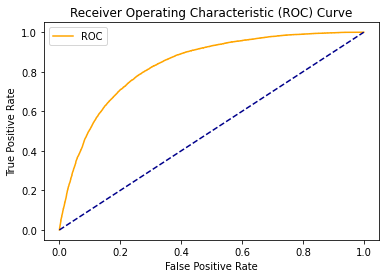

AUC : 0.8344363588883377


In [69]:
plot_roc_curve(fpr, tpr)
print('AUC :',roc_auc_score(Y_val,classification_prob['Overall_Avg']))

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
third_clf=AdaBoostClassifier(n_estimators=100,learning_rate=0.8,random_state=42)

In [72]:
third_clf.fit(X_train_final, Y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [73]:
y_pred_final3=third_clf.predict_proba(X_val_final)

In [74]:
classification_prob['ADABoost Classifier']=y_pred_final3[:,1]

In [75]:
fpr,tpr,thresholds=roc_curve(Y_val,y_pred_final3[:,1])
thresholds=thresholds[2:]

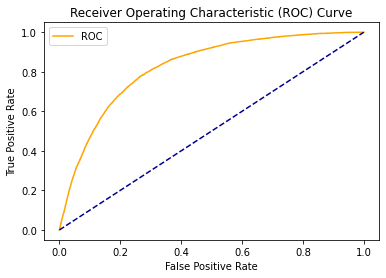

AUC : 0.8236225616828606


In [76]:
plot_roc_curve(fpr, tpr)
print('AUC :',roc_auc_score(Y_val,y_pred_final3[:,1]))

In [77]:
classification_prob['Overall_Avg']=(classification_prob['GB Classifier']+classification_prob['RF Classifier']+classification_prob['ADABoost Classifier'])/3

In [78]:
classification_prob

,RF Classifier,GB Classifier,Overall_Avg,ADABoost Classifier
0,0.127913,0.123746,0.248839,0.494857
1,0.091057,0.103100,0.229110,0.493174
2,0.074225,0.112058,0.226086,0.491975
3,0.081123,0.078017,0.217500,0.493360
4,0.127201,0.147390,0.256245,0.494145
...,...,...,...,...
39043,0.110591,0.163815,0.256063,0.493782
39044,0.518836,0.595806,0.538557,0.501028
39045,0.449047,0.523588,0.491355,0.501429
39046,0.010761,0.008508,0.168452,0.486087


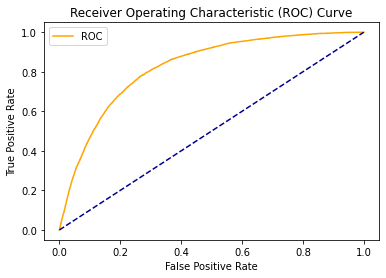

AUC : 0.83443644401371


In [79]:
plot_roc_curve(fpr, tpr)
print('AUC :',roc_auc_score(Y_val,classification_prob['Overall_Avg']))

In [80]:
a=np.linspace(0.1,0.99,10)
b=np.linspace(0.1,0.99,10)
c=np.linspace(0.1,0.99,10)


In [81]:
values={}
for i in a:
    for j in b:
        for k in c:
            s=(i+j+k)
            classification_prob['Overall_Avg']=((i/s)*classification_prob['GB Classifier']+(j/s)*classification_prob['RF Classifier']
                                        +(k/s)*classification_prob['ADABoost Classifier'])
            
            values[(i,j,k)]=roc_auc_score(Y_val,classification_prob['Overall_Avg'])

In [82]:
Keymax = max(values, key=values.get) 
print(Keymax) 

(0.99, 0.1, 0.1)


In [83]:
values[Keymax]

0.8354510262415018

In [84]:
total=sum(Keymax)

In [85]:
y_test_pred_ADB=third_clf.predict_proba(X_test_final)[:,1]

In [86]:
y_test_pred_GB=final_clf2.predict_proba(X_test_final)[:,1]

In [87]:
y_test_pred_RF=final_clf.predict_proba(X_test_final)[:,1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:    0.5s finished


In [88]:
final_clf_op=pd.DataFrame(y_test_pred_GB)

In [89]:
final_clf_op['RF']=y_test_pred_RF

In [90]:
final_clf_op['ADB']=y_test_pred_ADB

In [91]:
final_clf_op.columns=['GB','RF','ADB']

In [92]:
final_clf_op['Overall_Avg']=((Keymax[0]/total)*final_clf_op['GB']+
                             (Keymax[1]/total)*final_clf_op['RF']
                             +(Keymax[2]/total)*final_clf_op['ADB'])

In [93]:
final_clf_op

,GB,RF,ADB,Overall_Avg
0,0.100230,0.096485,0.492288,0.132861
1,0.141608,0.093882,0.493997,0.167210
2,0.199481,0.163284,0.496123,0.221367
3,0.079584,0.108311,0.490975,0.116569
4,0.220207,0.159343,0.495481,0.238224
...,...,...,...,...
10229,0.052251,0.093645,0.488834,0.092417
10230,0.043187,0.059925,0.490239,0.082161
10231,0.074532,0.067170,0.492713,0.109054
10232,0.020322,0.031632,0.487271,0.060512


In [94]:
encounter_IDs = pd.read_csv("../input/widsdatathon2021/UnlabeledWiDS2021.csv")[["encounter_id"]].values

In [95]:
df_sub = {'encounter_id': encounter_IDs[:,0], 'diabetes_mellitus':final_clf_op['Overall_Avg']} 

In [99]:
df_predictions = pd.DataFrame.from_dict(df_sub).set_index(['encounter_id'])
df_predictions.to_csv('submission_final.csv')